# 1. Introduction
Nama : Angelin Cathi Karlina  
Batch : 005  

Dataset yang digunakan adalah dataset OpinRank mengenai review mobil.

Objektif : membuat sentiment analysis review pembelian mobil

# 2. Import Modules

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import csv

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px

import spacy
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# 3. Loading Data

### Open & Read Data

In [2]:
toyota = open('/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_toyota_corolla')
hyundai = open('/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_hyundai_sonata')
honda = open('/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_honda_accord')

ford = open('/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_ford_fusion')

read_toy = toyota.read()
read_hyu = hyundai.read()
read_hon = honda.read()

read_ford = ford.read()

In [3]:
read_ford

'<DOCNO>2009_ford_fusion</DOCNO>\n<DOC>\n<DATE>09/11/2009</DATE>\n<AUTHOR>Jeff</AUTHOR>\n<TEXT>I\'ve owned my Fusion for over a month now and have 1,200 miles on it. Ride is nice and has a very responsive steering system. The trunk is large and the gas mileage has been decent @ 25mpg. The V6 has good power and the transmission shifts smoothly. The headrests are not comfortable and need to be redesigned, hopefully they got it right on the 2010 model. Overall, I am very happy with it and we chose it over the Camry, Accord and Sonata. It was a tough decision but so far so good.</TEXT>\n<FAVORITE>Body style and paint color (vapor smoke), interior comfort and performance </FAVORITE>\n</DOC>\n<DOC>\n<DATE>08/21/2009</DATE>\n<AUTHOR>Denise M.</AUTHOR>\n<TEXT>This is my 8th car, 2nd new car and first American made car. Initially I was elated with my purchase and glad that I decided to buy American. I drive 100 miles round trip 5 days a week. The drive home in my roomy and comfortable Fusion wa

In [4]:
#konversi data ke format html
data_toy = BeautifulSoup(read_toy, 'lxml')
data_hyu = BeautifulSoup(read_hyu, 'lxml')
data_hon = BeautifulSoup(read_hon, 'lxml')
data_ford = BeautifulSoup(read_ford, 'lxml')
print(data_hon)

<html><body><docno>2009_honda_accord</docno>
<doc>
<date>10/19/2009</date>
<author>pissed</author>
<text>After 18000 miles I had to have new back breaks put on. The leather is fading inside already - car is garage kept. Noise is really is ridiculous. Got 21k on it now and would trade it in if I could and get something else. Should have just saved my money and got the 4cylinder instead.</text>
<favorite>the power in the 6cl is great, seats are comfortable, great a/c</favorite>
</doc>
<doc>
<date>10/18/2009</date>
<author>Asif</author>
<text>I have owned Accord for close to 2 years now and it runs beautifully and I am very happy with my purchase. But there are 2 things, I would like to bring to other buyers notice. First, when it had about 20,000 miles, there was a cranky noise when you start it cold. Took to dealer and they changed the alternator for free. The other issue was noise from rear brakes and I had to finally replace them, with my own money. Feel it was too early for brakes to

### Convert Data to .csv File

In [5]:
#csv file to convert data in tag format into csv format
csv_toy = '/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_toyota_corolla.csv'
csv_hyu = '/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_hyundai_sonata.csv'
csv_hon = '/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_honda_accord.csv'
csv_ford = '/Users/angel/Downloads/OpinRankDataset/cars/2009/2009_ford_fusion.csv'

In [6]:
#list kosong untuk diisi data
csv_data_toy = []

#set nama kolom
csv_data_toy.append(['date','author','text','favorite'])

#print data dengan tag 'doc'
for doc_tag in data_toy.find_all('doc'):
    #loading data pada list utk diakumulasikan pada csv_data_toy
    raw_data = []
    
    #getting each values for a respective doc tag
    raw_data.append(doc_tag.find('date').text)
    raw_data.append(doc_tag.find('author').text)
    raw_data.append(doc_tag.find('text').text)
    raw_data.append(doc_tag.find('favorite').text)
    csv_data_toy.append(raw_data)

In [7]:
#list kosong untuk diisi data
csv_data_hyu = []

#set nama kolom
csv_data_hyu.append(['date','author','text','favorite'])

#print data dengan tag 'doc'
for doc_tag in data_hyu.find_all('doc'):
    #loading data pada list utk diakumulasikan pada csv_data_hyu
    raw_data = []
    
    #getting each values for a respective doc tag
    raw_data.append(doc_tag.find('date').text)
    raw_data.append(doc_tag.find('author').text)
    raw_data.append(doc_tag.find('text').text)
    raw_data.append(doc_tag.find('favorite').text)
    csv_data_hyu.append(raw_data)

In [8]:
#list kosong untuk diisi data
csv_data_hon = []

#set nama kolom
csv_data_hon.append(['date','author','text','favorite'])

#print data dengan tag 'doc'
for doc_tag in data_hon.find_all('doc'):
    #loading data pada list utk diakumulasikan pada csv_data_hon
    raw_data = []
    
    #getting each values for a respective doc tag
    raw_data.append(doc_tag.find('date').text)
    raw_data.append(doc_tag.find('author').text)
    raw_data.append(doc_tag.find('text').text)
    raw_data.append(doc_tag.find('favorite').text)
    csv_data_hon.append(raw_data)

In [9]:
#list kosong untuk diisi data
csv_data_ford = []

#set nama kolom
csv_data_ford.append(['date','author','text','favorite'])

#print data dengan tag 'doc'
for doc_tag in data_ford.find_all('doc'):
    #loading data pada list utk diakumulasikan pada csv_data_hon
    raw_data = []
    
    #getting each values for a respective doc tag
    raw_data.append(doc_tag.find('date').text)
    raw_data.append(doc_tag.find('author').text)
    raw_data.append(doc_tag.find('text').text)
    raw_data.append(doc_tag.find('favorite').text)
    csv_data_ford.append(raw_data)

In [10]:
#fungsi untuk mengubah list ke csv
def write_csv(file,data):
    with open(file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

        
#konversi list ke csv
write_csv(csv_toy,csv_data_toy)
write_csv(csv_hyu,csv_data_hyu)
write_csv(csv_hon,csv_data_hon)
write_csv(csv_ford,csv_data_ford)

### Loading Data dengan DataFrame

In [11]:
#df toyota
df_raw_toy = pd.read_csv(csv_toy)
df_raw_toy.head(3)

date    author                                               text  \
0  10/20/2009       JMG  The Corolla is a good commuter car that will r...   
1  10/17/2009  heiliner  My 2009 Corolla LE has about 23000 miles on it...   
2  10/07/2009    vtnc85  I have owned my 2009 Toyota Corolla LE since M...   

                                            favorite  
0  Great fuel economy, standard side impact air b...  
1  The fuel economy is remarkable. I get between ...  
2  XM Radio inside the dash, Aux input for iPods,...

In [12]:
#df hyundai
df_raw_hyu = pd.read_csv(csv_hyu)
df_raw_hyu.head(3)

date           author  \
0  10/21/2009      silvereagle   
1  10/17/2009           Martin   
2  10/17/2009  replaced toyota   

                                                text  \
0  Just bought my Sonata 5 days ago. traded a 200...   
1  After less than 1000 miles the car started pul...   
2  I purchased my Sonata after looking at Nisson ...   

                                            favorite  
0                           interior,ride and milage  
1  USB input,nice interior,spacious interior and ...  
2                                           xm radio

In [13]:
#df honda
df_raw_hon = pd.read_csv(csv_hon)
df_raw_hon.head(3)

date  author                                               text  \
0  10/19/2009  pissed  After 18000 miles I had to have new back break...   
1  10/18/2009    Asif  I have owned Accord for close to 2 years now a...   
2  10/17/2009     CBS  Love the larger size of the car. Took a 600 mi...   

                                            favorite  
0  the power in the 6cl is great, seats are comfo...  
1                                                NaN  
2                          Leather seats and stereo.

In [14]:
#df ford
df_raw_ford = pd.read_csv(csv_ford)
df_raw_ford.head(3)

date             author  \
0  09/11/2009               Jeff   
1  08/21/2009          Denise M.   
2  08/19/2009  Stephen Krautheim   

                                                text  \
0  I've owned my Fusion for over a month now and ...   
1  This is my 8th car, 2nd new car and first Amer...   
2  We purchased a 2009 SEL I4 in April to replace...   

                                            favorite  
0  Body style and paint color (vapor smoke), inte...  
1  The 2009 Ford Fusion is a smooth roomy drive. ...  
2                        Well built safety cage SYNC

### Cek Informasi Umum Setiap DataFrame

In [15]:
#info df toyota
df_raw_toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      226 non-null    object
 1   author    226 non-null    object
 2   text      226 non-null    object
 3   favorite  215 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [16]:
#info df hyundai
df_raw_hyu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      262 non-null    object
 1   author    262 non-null    object
 2   text      262 non-null    object
 3   favorite  251 non-null    object
dtypes: object(4)
memory usage: 8.3+ KB


In [17]:
df_raw_hon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      224 non-null    object
 1   author    224 non-null    object
 2   text      224 non-null    object
 3   favorite  208 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [18]:
df_raw_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      73 non-null     object
 1   author    73 non-null     object
 2   text      73 non-null     object
 3   favorite  72 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


- DataFrame toyota, hyundai, honda dan ford hanya memiliki missing values pada kolom `favorite`, hal ini kemungkinan dikarenakan pada penulisan review tidak wajib mengisi kolom favorite.

### Descriptive Statistics Categorical Data

In [19]:
#toyota
df_raw_toy.select_dtypes(object).describe().T

count unique                                                top freq
date       226    171                                         08/19/2008    4
author     226    208                                                Don    4
text       226    226  Only had the car for 6 days and 340 miles. Car...    1
favorite   215    214                                        Gas mileage    2

In [20]:
#hyudai
df_raw_hyu.select_dtypes(object).describe().T

count unique                                                top freq
date       262    210                                         01/08/2009    3
author     262    247                                              Karen    3
text       262    261                                  Favorite Features    2
favorite   251    251  The redesigned interior, the radio, the fuel e...    1

In [21]:
#honda
df_raw_hon.select_dtypes(object).describe().T

count unique                                                top freq
date       224    177                                         05/01/2009    4
author     224    215                                        sunmoonroof    2
text       224    224  My wife and I love the car. The standard safet...    1
favorite   208    207                                           Exterior    2

In [22]:
#ford
df_raw_ford.select_dtypes(object).describe().T

count unique                                                top freq
date        73     65                                         03/18/2009    2
author      73     70                                                Bob    3
text        73     73  Much better than I anticipated for the price. ...    1
favorite    72     72                            Ride/comfort, Sync, MPG    1

- Terdapat beberapa orang dengan nama yang sama yang mengisi review, kemungkinan karena nama-nama tersebut merupakan nama yang umum sehingga cukup wajar jika terdapat nama yang sama.
- Pada review mobil hyundai, kolom `text` memiliki data duplikat, selanjutnya akan diidentifikasi apakah data tersebut adalah data duplikat atau hanya kebetulan memiliki review yang sama.


# 4. Data Cleaning

### Penggabungan DataFrame
- DataFrame Toyota, Hyundai, dan Honda akan digabungkan menjadi df_train_raw
- DataFrame Ford akan diubah nama variabelnya menjadi df_test_raw

- Sebelum melakukan penggabungan dataframe, akan ditambahkan kolom `brand` untuk keperluan analisis data

In [23]:
#tambah kolom `brand`
df_raw_toy['brand'] = ['toyota']*226
df_raw_hyu['brand'] = ['hyundai']*262
df_raw_hon['brand'] = ['honda']*224
df_raw_ford['brand'] = ['ford']*73

In [24]:
df_raw_train = pd.concat([df_raw_toy, df_raw_hyu, df_raw_hon])
df_raw_train

date     author                                               text  \
0    10/20/2009        JMG  The Corolla is a good commuter car that will r...   
1    10/17/2009   heiliner  My 2009 Corolla LE has about 23000 miles on it...   
2    10/07/2009     vtnc85  I have owned my 2009 Toyota Corolla LE since M...   
3    10/04/2009       Ugh!  This is absolutely the most boring car I've ev...   
4    10/03/2009          G  Overall I like my Corolla. I chose a Corolla b...   
..          ...        ...                                                ...   
219  07/03/2009  i_vtec_i4  This is my 3rd Accord. Had an 04 & 07, both le...   
220  07/02/2009      Rob C  After owning a VW Jetta for the past 5 years I...   
221  07/02/2009        Don  I have owned this Accord for 7 months and over...   
222  07/01/2009        CGS  We bought this car as the least expensive opti...   
223  06/28/2009     mes357  I traded my 2003 Camry. Went to get it back in...   

                                              favorite   brand  
0    Great fuel economy, standard side impact air b...  toyota  
1    The fuel economy is remarkable. I get between ...  toyota  
2    XM Radio inside the dash, Aux input for iPods,...  toyota  
3    None. It has an aux input, moonroof, alloys, e...  toyota  
4    Fuel efficiency. I get a special parking spot ...  toyota  
..                                                 ...     ...  
219  Increased horsepower. New instrument panel/rad...   honda  
220  Handling for a mid-large sedan. Interior desig...   honda  
221  It's always the little things that count the m...   honda  
222  Suspension and road handling, XM radio is fun ...   honda  
223                  Moon roof is great, Leather seats   honda  

[712 rows x 5 columns]

In [25]:
df_raw_test = df_raw_ford

### Drop `date` and `author` Columns
- Karena kedua data ini tidak diperlukan dalam menganalisis sentiment review, maka akan di drop

In [26]:
df_raw_train.drop(['author','date'], axis=1, inplace = True)
df_raw_test.drop(['author','date'], axis=1, inplace = True)

### Missing Values 

In [27]:
print(f'jumlah missing values train : {df_raw_train.isnull().values.sum()}')
print(f'jumlah missing values test : {df_raw_ford.isnull().values.sum()}')

jumlah missing values train : 38
jumlah missing values test : 1


- Pada semua DataFrame, hanya data `favorite` yang memiliki missing value. Oleh karena itu, kolom ini akan di drop

In [28]:
#drop kolom `favorite` 
df_raw_train.drop(['favorite'], axis=1, inplace = True)
df_raw_test.drop(['favorite'], axis=1, inplace = True)
print(f'jumlah missing values train : {df_raw_train.isnull().values.sum()}')
print(f'jumlah missing values test : {df_raw_test.isnull().values.sum()}')

jumlah missing values train : 0
jumlah missing values test : 0


### Duplicated Data

In [29]:
#deteksi data duplikat
print('banyaknya data train terduplikasi :', df_raw_train.duplicated().sum())
print('banyaknya data test terduplikasi :', df_raw_test.duplicated().sum())

banyaknya data train terduplikasi : 1
banyaknya data test terduplikasi : 0


In [30]:
#cek data train yang terindikasi merupakan data duplikat
df_raw_dup = df_raw_train[df_raw_train.duplicated(keep='last')]
df_raw_dup

text    brand
116  Favorite Features  hyundai

In [31]:
#drop baris data duplikat dan ubah nama variable df_raw_train menjadi df_train
df_train = df_raw_train.drop_duplicates(keep='last')
df_train.reset_index(drop = True, inplace = True)

#ubah penamaan data test 
df_test = df_raw_test

In [32]:
print('banyaknya data train terduplikasi :', df_train.duplicated().sum())
print('banyaknya data test terduplikasi :', df_test.duplicated().sum())

banyaknya data train terduplikasi : 0
banyaknya data test terduplikasi : 0


### DataFrame Train dan Test Setelah Cleaning

In [33]:
print('train data shape :',df_train.shape)
df_train.head(2)

train data shape : (711, 2)


text   brand
0  The Corolla is a good commuter car that will r...  toyota
1  My 2009 Corolla LE has about 23000 miles on it...  toyota

In [34]:
print('test data shape :',df_test.shape)
df_test.head(2)

test data shape : (73, 2)


text brand
0  I've owned my Fusion for over a month now and ...  ford
1  This is my 8th car, 2nd new car and first Amer...  ford

# 5. Data Preprocessing

### Feature Engineering

In [35]:
# General Pre-processing 
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = decontracted(sent)
    sent = re.sub('[%s]' % re.escape(string.punctuation), '', sent) # strip punctuation
    sent = re.sub('\s+', ' ', sent) #remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

In [36]:
#preprocessing data train dan test

df_train['text']=df_train['text'].apply(lambda x: preprocess(x))
df_test['text']=df_test['text'].apply(lambda x: preprocess(x))

### Penambahan Fitur
- Penambahan fitur hanya akan dilakukan pada data train untuk melakukan visualisasi data
- Fitur yang akan ditambahkan adalah:
    - word_count = penghitungan jumlah kata
    - unique_word_count = penghitungan kata unik
    - stopword_count = penghitungan stopwords
    - unique_vs_words = rasio kata unik dan kata pada kalimat
    - stopwords_vs_words = rasio stopwords dan kata pada kalimat

In [37]:
# count number of words 
def count_words(text):
    return len(text.split())

# count number of unique words 
def count_unique_words(text):
    return len(set(text.split()))

# count of stopwords
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

# stopwords vs words
def stopwords_vs_words(stopwords_cnt,text):
    return stopwords_cnt/len(word_tokenize(text))

In [38]:
#word_count
df_train['word_count'] = df_train['text'].apply(lambda x:count_words(x))

#unique_word_count & stopword_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x:count_unique_words(x))
df_train['stopword_count'] = df_train['text'].apply(lambda x:count_stopwords(x))
                                                       
#unique_vs_words  &  stopwords_vs_words                                                      
df_train['unique_vs_words']=df_train['unique_word_count']/df_train['word_count']
df_train['stopwords_vs_words']=df_train['stopword_count']/df_train['word_count']

In [39]:
df_train.head(2)

text   brand  word_count  \
0  the corolla is a good commuter car that will r...  toyota          95   
1  my  corolla le has about  miles on it and stee...  toyota         133   

   unique_word_count  stopword_count  unique_vs_words  stopwords_vs_words  
0                 68              49         0.715789            0.515789  
1                 81              66         0.609023            0.496241

### NLP Pipelines

In [40]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['ner'])
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']


In [41]:
# Lemmatization with stopwords removal
df_train['lemmatized']=df_train['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_test['lemmatized']=df_test['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

### Sentiment Score
- Karena dataset yang digunakan merupakan review yang belum memiliki label, maka pada tahap ini akan dilakukan polarity scoring yang digunakan untuk memperoleh skor yang kemudian akan diolah menjadi label.

In [42]:
#sentiment polarity
df_train['polarity']=df_train['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_test['polarity']=df_test['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

# tampilkan DataFrame terupdate
df_train.head(2)

text   brand  word_count  \
0  the corolla is a good commuter car that will r...  toyota          95   
1  my  corolla le has about  miles on it and stee...  toyota         133   

   unique_word_count  stopword_count  unique_vs_words  stopwords_vs_words  \
0                 68              49         0.715789            0.515789   
1                 81              66         0.609023            0.496241   

                                          lemmatized  polarity  
0  corolla good commuter car retain value year ch...     0.245  
1    corolla le   mile steer great handle great c...     0.475

In [43]:
# buat conditions untuk melakukan pelabelan
conditions = [
    (df_train['polarity'] > 0.1),
    (df_train['polarity'] < -0.1),
    (df_train['polarity'] >= -0.1) | (df_train['polarity'] <= 0.1)
    ]

conditions_test = [
    (df_test['polarity'] > 0.1),
    (df_test['polarity'] < -0.1),
    (df_test['polarity'] >= -0.1) | (df_test['polarity'] <= 0.1)
    ]

#buat values sesuai conditions yang ditetapkan
values = ['positive', 'negative', 'neutral']

# buat kolom `sentiment` untuk hasil pelabelan
df_train['sentiment'] = np.select(conditions, values)
df_test['sentiment'] = np.select(conditions_test, values)

# tampilkan DataFrame terupdate
df_train.head()

text   brand  word_count  \
0  the corolla is a good commuter car that will r...  toyota          95   
1  my  corolla le has about  miles on it and stee...  toyota         133   
2  i have owned my  toyota corolla le since may  ...  toyota         122   
3  this is absolutely the most boring car i have ...  toyota         132   
4  overall i like my corolla i chose a corolla ba...  toyota          87   

   unique_word_count  stopword_count  unique_vs_words  stopwords_vs_words  \
0                 68              49         0.715789            0.515789   
1                 81              66         0.609023            0.496241   
2                 81              67         0.663934            0.549180   
3                 79              72         0.598485            0.545455   
4                 66              40         0.758621            0.459770   

                                          lemmatized  polarity sentiment  
0  corolla good commuter car retain value year ch...  0.245000  positive  
1    corolla le   mile steer great handle great c...  0.475000  positive  
2  own   toyota corolla le   purchase right avail...  0.157143  positive  
3  absolutely boring car own own sedan coupe conv... -0.351042  negative  
4  overall like corolla choose corolla base reput... -0.066667   neutral

#### Contoh negative review

In [44]:
df_train['text'].iloc[3]

'this is absolutely the most boring car i have ever owned i have owned everything from sedans to coupes to convertibles and trucks this is the least inspiring car i could ever imagine to own i drive a lot for work and i just wanted something with good fuel economy and a reputation for reliability i suppose it has that in spades but that is all it has in a practical sense there is nothing wrong with the car it does what it is meant to do but i hate driving this car i can not wait until i get rid of it the engine is lifeless and the steering and handling are nonexistent boring boring boring boring i will probably never buy another toyota and would never buy a lexus either'

#### Contoh positive review

In [45]:
df_train['text'].iloc[0]

'the corolla is a good commuter car that will retain its value and last for years it is cheap honest transportation with a few bonuses like standard side impact airbags the biggest drawback with the  corolla is the steering it is incredibly vague and drifts on the freeway looking back i wish i would have leased the car with a manual transmission at the time there were not that many on the lot i love toyotas in general we also have an  camry in the family service has been very good at our local dealer '

#### Contoh neutral review

In [46]:
df_train['text'].iloc[4]

'overall i like my corolla i chose a corolla base on its reputation and intellichoicecom recommendation along with the civic it has the lowest total cost of ownership the reason i picked the corolla it was simply because toyota gave me more for the money alloy wheels power locks and windows etc i am intending to keep this car for a few years so i bought extended warranty and paint and rust protection toyota could have worked on the interior a bit the stereo seems cheap quality'

### Tokenizing and Padding

In [1]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_train['lemmatized'])
X = tokenizer.texts_to_sequences(df_train['lemmatized'])
X = pad_sequences(X, maxlen = 200)
X

NameError: name 'Tokenizer' is not defined

In [48]:
y =  pd.get_dummies(df_train['sentiment']).values
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

### Split Train & Validation Data

In [49]:
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print('X_train shape :', X_train.shape)
print('X_val shape:', X_val.shape)

X_train shape : (568, 200)
X_val shape: (143, 200)


# 6. Data Exploration

### Distribusi Sentiment

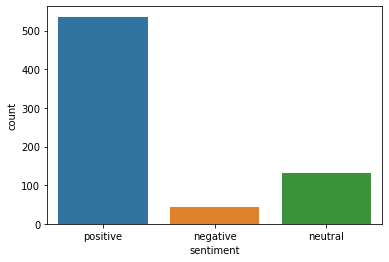

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data = df_train)
plt.show()

- Kebanyakan pembeli memberikan review postif terhadap mobil yang mereka beli
- Dataset ini merupakan dataset imbalance, karena jumlah data positif jauh lebih banyak daripada neutral dan negative.

### Distribusi Kata pada Rewiew dan Kata Unik 

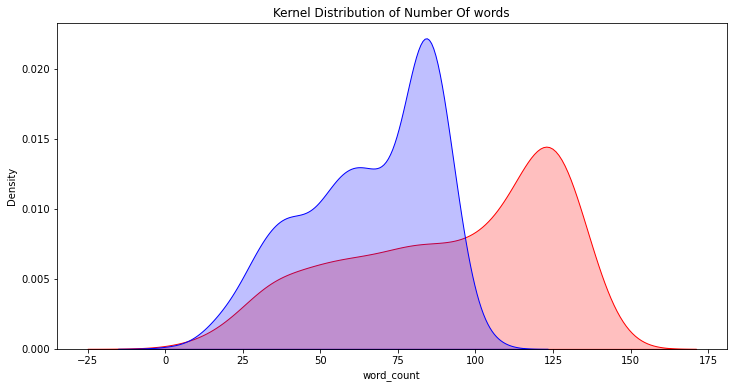

In [51]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_train['word_count'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(df_train['unique_word_count'], shade=True, color="b")

- Distribusi kata pada review paling banyak pada 125 kata
- Pada tulisan review pembeli ditemukan rata-rata memiliki sekitar 80 kata unik

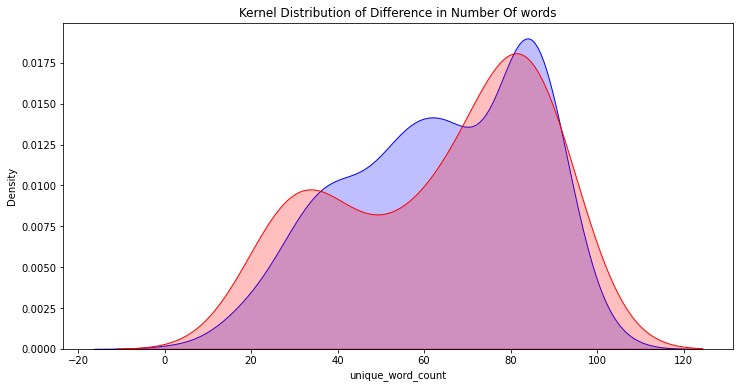

In [52]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_train[df_train['sentiment']=='positive']['unique_word_count'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(df_train[df_train['sentiment']=='negative']['unique_word_count'], shade=True, color="r")

- Review dengan sentiment poisitve dan negative memiliki kata unik yang terdistribusi cukup mirip, rata-rata paling banyak memiliki 80-90 kata unik.

### Common Words

In [53]:
#Most common words
df_train['temp_list'] = df_train['lemmatized'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [54]:
#visualisasi most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [55]:
#MosT common negative words
negative_sent = df_train[df_train['sentiment']=='negative']
top = Counter([item for sublist in negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']

In [56]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [57]:
#MosT common Positive words
positive_sent = df_train[df_train['sentiment']=='positive']
top = Counter([item for sublist in positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']

In [58]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

- Kata terbanyak adalah kata 'car' dan 'drive', yang mana cukup wajar karena review ini terkait dengan pembelian mobil
- Pada kata negatif, kata yang umum muncul pada review adalah 'bad', 'noise', 'problem', 'issue'
- Pada kata positif, kata yang umum muncul pada review adalah 'great', 'good', 'like', 'love'

### WordCloud - Toyota Corolla : Negative Sentiment

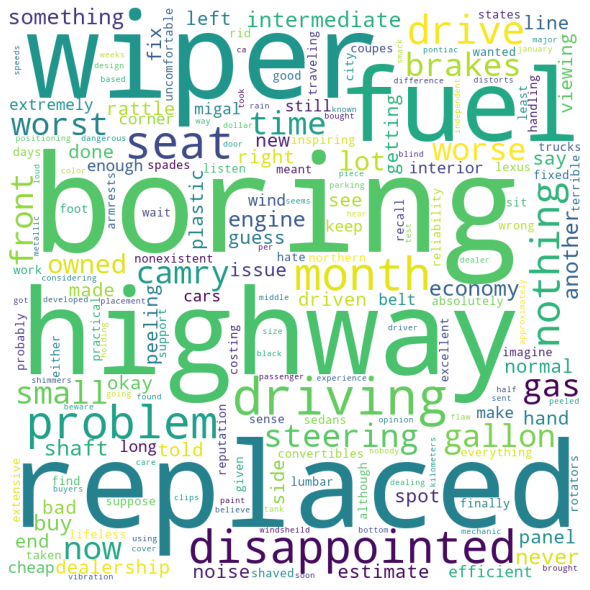

In [59]:
comment_words = ''
stop_words = ['toyota','corolla','hyundai','sonata','honda', 'accord','car', 'miles', 'will', 'purchased', 'one',
             'back'] + list(STOPWORDS)
 
# iterate through the csv file
for val in df_train[(df_train['brand']=='toyota')&(df_train['sentiment']=='negative')].text:
    val = str(val)
 
    # split the value
    tokens = val.split()
    comment_words += ' '.join(tokens)+' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
#plot wordcloud                  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

- Review negatif pada mobil toyota banyak memiliki kata 'recplaced', 'boring', 'problem', 'dissapointed', 'issue', 'cheap', 'noise', 'worse', dsb.

### WordCloud - Toyota Corolla : Positive Sentiment

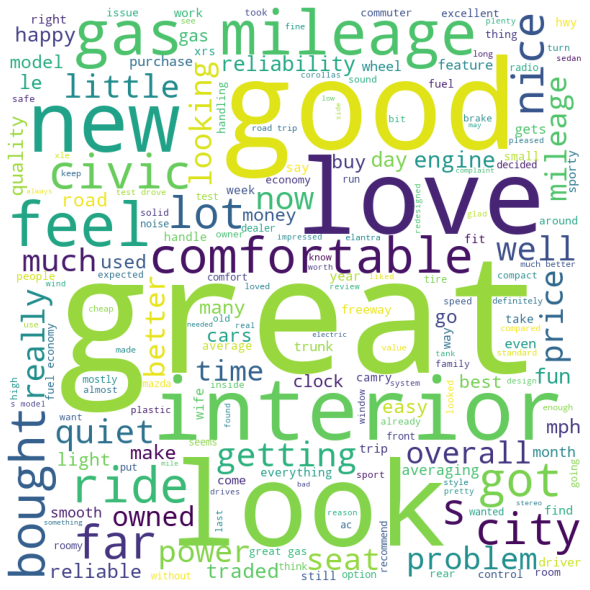

In [60]:
comment_words = ''
stop_words = ['toyota','corolla','hyundai','sonata','honda', 'accord','car', 'miles', 'will', 'purchased', 'one',
             'back','drive','driving', 'mpg', 'highway', 'steering', 'first', 'need', 'every', 'vehicle'] + list(STOPWORDS)
 
# iterate through the csv file
for val in df_train[(df_train['brand']=='toyota')&(df_train['sentiment']=='positive')].text:
    val = str(val)
 
    # split the value
    tokens = val.split()
    comment_words += ' '.join(tokens)+' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
#plot wordcloud                  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### ### WordCloud - Honda Accord : Positive Sentiment

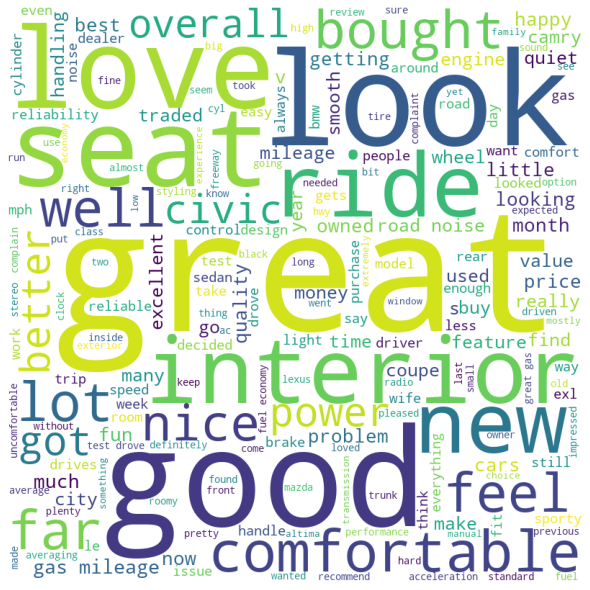

In [61]:
for val in df_train[(df_train['brand']=='honda')&(df_train['sentiment']=='positive')].text:
    val = str(val)
 
    # split the value
    tokens = val.split()
    comment_words += ' '.join(tokens)+' '
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
#plot wordcloud                  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

- Pada review dengan sentimen positif mobil toyota dan honda memiliki cukup banyak kemiripan
- Kata-kata yang banyak ditemukan adalah 'great', 'love', 'good', 'comfortable'

# 7. Defining  and Training Model

### LSTM

In [62]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [63]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(max_features, 128, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [64]:
from keras.callbacks import EarlyStopping
#history = model.fit(X_train, y_train, batch_size = 64, epochs=20, validation_data=(X_val, y_val))


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, min_delta=0.0001),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
]


history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val),
                    callbacks=my_callbacks)

Epoch 1/50
5/5 [==============================] - 7s 997ms/step - loss: 1.0925 - accuracy: 0.4683 - val_loss: 1.0712 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 5s 955ms/step - loss: 1.0566 - accuracy: 0.6479 - val_loss: 0.9751 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 5s 951ms/step - loss: 1.0000 - accuracy: 0.6144 - val_loss: 0.8752 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 5s 979ms/step - loss: 0.9250 - accuracy: 0.6496 - val_loss: 0.7615 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.8570 - accuracy: 0.6813 - val_loss: 0.7919 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 0.8643 - accuracy: 0.6972 - val_loss: 0.7818 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.7809 - accuracy: 

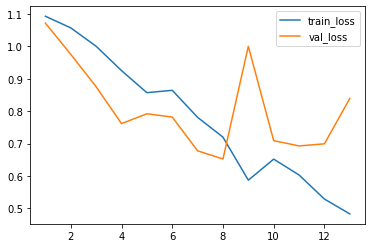

In [66]:
#Sequential model loss
x_axis  = np.arange(1,14)
plt.plot(x_axis, history.history['loss'], label='train_loss')
plt.plot(x_axis, history.history['val_loss'], label='val_loss')
plt.legend()

- Model yang dihasilkan overfitting, selanjutnya akan dilakukan percobaan untuk modelling dengan menambah layer dan jumlah neuron dengan bidirectional LSTM dan GRU.

# 8. Model Improvement

## Bidirectional LSTM

In [73]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [74]:
#BiLSTM

model1 = Sequential()
model1.add(Embedding(max_features, 256, input_length=X.shape[1]))
model1.add(Bidirectional(LSTM(256, return_sequences=True, input_shape=(None, 1))))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dropout(0.2))

#model1.add(Dense(128, activation='relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.3))
#model1.add(Dense(4, activation='relu'))
#model1.add(Dropout(0.3))

model1.add(Dense(3, activation='softmax'))
adam = Adam(learning_rate=0.01)
model1.compile(
    loss='categorical_crossentropy', 
    optimizer=adam, 
    metrics=['AUC','Precision','Recall','accuracy']
)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 256)          512000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 512)         1050624   
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 200, 512)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [75]:
from keras.callbacks import EarlyStopping
#history = model.fit(X_train, y_train, batch_size = 64, epochs=20, validation_data=(X_val, y_val))


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, min_delta=0.0001),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001),
    tf.keras.callbacks.ModelCheckpoint(filepath='/Users/angel/OneDrive/Documents/hacktiv8/models/model_bilstm.{epoch:02d}-{val_loss:.2f}.h5')
]


history1 = model1.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_val, y_val),
                    callbacks=my_callbacks)

Epoch 1/50
2/2 [==============================] - 46s 14s/step - loss: 1.1022 - auc: 0.3634 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1919 - val_loss: 0.9233 - val_auc: 0.8011 - val_precision: 0.8000 - val_recall: 0.3636 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 2/50
2/2 [==============================] - 34s 12s/step - loss: 1.1489 - auc: 0.6166 - precision: 0.6007 - recall: 0.2887 - accuracy: 0.5106 - val_loss: 0.9326 - val_auc: 0.7860 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 3/50
2/2 [==============================] - 34s 12s/step - loss: 0.9525 - auc: 0.7612 - precision: 0.7490 - recall: 0.3204 - accuracy: 0.6496 - val_loss: 0.8224 - val_auc: 0.7840 - val_precision: 0.7552 - val_recall: 0.7552 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 4/50
2/2 [==============================] - 35s 13s/step - loss: 1.1421 - auc: 0.7669 - precision: 0.7109 - recall: 0.4718 - accuracy: 0.6690 - val_loss: 0.8361 - val_auc: 0.7980 -

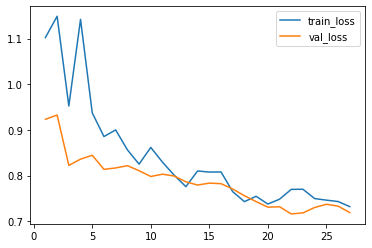

In [77]:
#Sequential model loss
x_axis  = np.arange(1,28)
plt.plot(x_axis, history1.history['loss'], label='train_loss')
plt.plot(x_axis, history1.history['val_loss'], label='val_loss')
plt.legend()

- Hasil terbaik pada training model LSTM terdapat pada epoch ke-22 dengan hasil sebagai berikut :
    - loss: 0.7699 
    - auc: 0.8308 
    - precision: 0.7505 
    - recall: 0.7095 
    - accuracy: 0.7535 
    - val_loss: 0.7162 
    - val_auc: 0.8397 
    - val_precision: 0.7552 
    - val_recall: 0.7552 
    - val_accuracy: 0.7552

## Bidirectional GRU

In [94]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [95]:
#BiGRU

model2 = Sequential()
model2.add(Embedding(max_features, 512, input_length=X.shape[1]))
model2.add(Bidirectional(GRU(512, return_sequences=True, input_shape=(None, 1))))
model2.add(Dropout(0.2))
model2.add(Bidirectional(GRU(256)))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(3, activation='softmax'))
adam = Adam(learning_rate=0.01)
model2.compile(
    loss='categorical_crossentropy', 
    optimizer=adam, 
    metrics=['AUC','Precision','Recall','accuracy']
)
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 512)          1024000   
                                                                 
 bidirectional_14 (Bidirecti  (None, 200, 1024)        3151872   
 onal)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 200, 1024)         0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 512)              1969152   
 onal)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 256)              

In [96]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, min_delta=0.0001),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=8, min_lr=0.001),
    tf.keras.callbacks.ModelCheckpoint(filepath='/Users/angel/OneDrive/Documents/hacktiv8/models/model_gru.{epoch:02d}-{val_loss:.2f}.h5')
]


history2 = model2.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_val, y_val),
                    callbacks=my_callbacks)

Epoch 1/50
2/2 [==============================] - 194s 86s/step - loss: 1.1952 - auc: 0.6859 - precision: 0.7857 - recall: 0.0775 - accuracy: 0.7025 - val_loss: 0.7956 - val_auc: 0.7737 - val_precision: 0.7552 - val_recall: 0.7552 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 2/50
2/2 [==============================] - 188s 98s/step - loss: 0.8601 - auc: 0.8008 - precision: 0.7548 - recall: 0.6937 - accuracy: 0.7465 - val_loss: 1.3445 - val_auc: 0.8487 - val_precision: 0.7552 - val_recall: 0.7552 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 3/50
2/2 [==============================] - 181s 87s/step - loss: 1.3499 - auc: 0.8261 - precision: 0.7387 - recall: 0.7218 - accuracy: 0.7289 - val_loss: 0.8184 - val_auc: 0.8592 - val_precision: 0.8026 - val_recall: 0.4266 - val_accuracy: 0.7552 - lr: 0.0100
Epoch 4/50
2/2 [==============================] - 200s 103s/step - loss: 0.8435 - auc: 0.8181 - precision: 0.7194 - recall: 0.3926 - accuracy: 0.6514 - val_loss: 0.7914 - val_auc: 0.8332 - val_precis

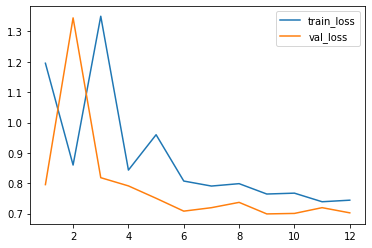

In [97]:
#Sequential model loss
x_axis  = np.arange(1,13)
plt.plot(x_axis, history2.history['loss'], label='train_loss')
plt.plot(x_axis, history2.history['val_loss'], label='val_loss')
plt.legend()

- Meskipun terdapat lonjakan nilai loss pada epoch awal, model biGRU ini dapat convergen secara bertahap meskipun hanya sampai pada nilai loss sekiatar 0.7
- Skor terbaik yang diperoleh dari model ini adalah pada epoch ke 9 :
    - loss: 0.7646 
    - auc: 0.8411 
    - precision: 0.7490 
    - recall: 0.6461 
    - accuracy: 0.7095 
    - val_loss: 0.6991 
    - val_auc: 0.8590 
    - val_precision: 0.7552 
    - val_recall: 0.7552 
    - val_accuracy: 0.7552

# 9. Model Evaluation
- Oleha karena model LSTM overfitting, maka model yang akan dievaluasi adalah model BiLSTM dan BiGRU saja

### Evaluasi Model Bidirectional LSTM

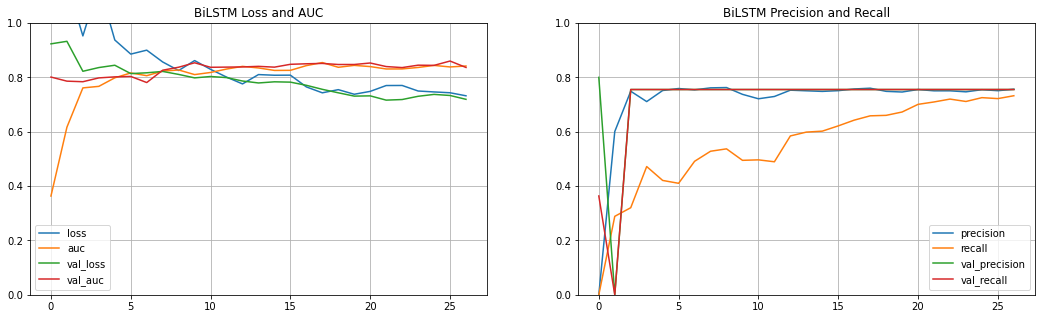

In [98]:
#Evaluasi model BiLSTM
loss_auc = {x: history1.history[x] for x in ['loss', 'auc','val_loss', 'val_auc']}
prec_rec = {x: history1.history[x] for x in ['precision','recall','val_precision','val_recall']}

fig, ax = plt.subplots(1,2,figsize=(18, 5))

plt.rcParams['axes.grid'] = True
plt.setp(ax, ylim=(0,1))
pd.DataFrame(loss_auc).plot(ax=ax[0])
ax[0].set_title('BiLSTM Loss and AUC')
pd.DataFrame(prec_rec).plot(ax=ax[1])
ax[1].set_title('BiLSTM Precision and Recall')

plt.show()

### Evaluasi Model Bidirectional GRU

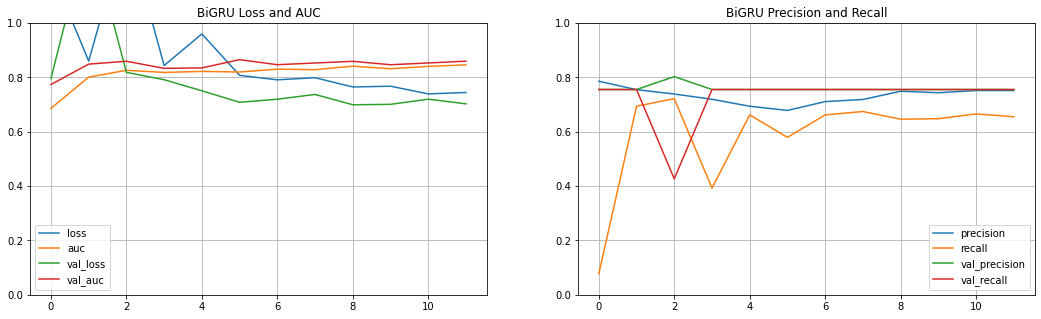

In [99]:
#Evaluasi model BiGRU
loss_auc = {x: history2.history[x] for x in ['loss', 'auc','val_loss', 'val_auc']}
prec_rec = {x: history2.history[x] for x in ['precision','recall','val_precision','val_recall']}

fig, ax = plt.subplots(1,2,figsize=(18, 5))

plt.rcParams['axes.grid'] = True
plt.setp(ax, ylim=(0,1))
pd.DataFrame(loss_auc).plot(ax=ax[0])
ax[0].set_title('BiGRU Loss and AUC')
pd.DataFrame(prec_rec).plot(ax=ax[1])
ax[1].set_title('BiGRU Precision and Recall')

plt.show()

### Evaluasi model dengan data Test

In [166]:
#Tokenizing dan padding data test
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_test['lemmatized'])
X_test = tokenizer.texts_to_sequences(df_test['lemmatized'])
X_test = pad_sequences(X_test, maxlen = 200)

In [167]:
#encoding data label
y_test =  pd.get_dummies(df_test['sentiment']).values

In [168]:
tf.keras.backend.clear_session

<function keras.backend.clear_session()>

In [169]:
#evaluasi model biLSTM dan biGRU
test_bilstm = model1.evaluate(X_test, y_test)
test_bigru = model2.evaluate(X_test, y_test)
test = [test_bilstm, test_bigru]

    
#buat ke dalam dataframe
model_eval = pd.DataFrame([x for x in test], 
                    columns=['Loss','AUC','Precision','Recall', 'Accuracy'])
model_eval = pd.concat([pd.Series(['Bidirectional LSTM Model', 'Bidirectional GRU Model'], 
                            name = 'Model'),model_eval], axis=1)
model_eval

3/3 [==============================] - 17s 5s/step - loss: 0.4917 - auc: 0.9328 - precision: 0.8904 - recall: 0.8904 - accuracy: 0.8904


Model      Loss       AUC  Precision    Recall  Accuracy
0  Bidirectional LSTM Model  0.535863  0.939576   0.890411  0.890411  0.890411
1   Bidirectional GRU Model  0.491707  0.932820   0.890411  0.890411  0.890411

- Dari hasil evaluasi model dengan BiLSTM dan BiGRU, diperoleh bahwa hasil loss pada Bidirectional GRU Model lebih baik daripada BiLSTM Model.
- Hasil perolehan nilai AUC, Precision, Recall dan Accuracy untuk kedua model adalah sama, sehingga yang menjadi pertimbangan untuk memilih model adalah nilai loss.
- Oleh karena itu, model yang akan diguanakan sebagai model inference adalah Bidirectional GRU Model.

# 10. Model Saving
- Pada saat melakukan pelatihan model telah dilakukan model saving dengan menggunakan callback

In [170]:
my_model.save('model_gru.09-0.70.h5')

# 11. Model Inference

#### Buat data text baru

In [172]:
txt = ['I am really happy with the fuel economy and features of this car. It is fun to drive but still gets very respectable mpg. I still have power when I need it. We also have a Honda Civic Hybrid, and the VW is getting better mileage, and is much more fun to drive.']

df_txt =  pd.DataFrame(txt, columns=['text'])
df_txt

text
0  I am really happy with the fuel economy and fe...

#### Preprocessing

In [173]:
df_txt['text'] = df_txt['text'].apply(lambda x: preprocess(x))
df_txt['lemmatized']=df_txt['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [174]:
df_txt

text  \
0  i am really happy with the fuel economy and fe...   

                                          lemmatized  
0  happy fuel economy feature car fun drive get r...

#### Prediksi

In [175]:
labels = ['negative', 'neutral', 'positive']

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_txt['lemmatized'])
X_inf = tokenizer.texts_to_sequences(df_txt['lemmatized'])
X_inf = pad_sequences(X_inf, maxlen = 200)
predictions = my_model.predict(X_inf)

for pred in predictions:
    print(pred, labels[np.argmax(pred)])

[0.09555823 0.18250269 0.721939  ] positive


# 12. Conclusions

### EDA Analysis
- Kebanyakan pembeli puas dengan mobil yang mereka beli, hal ini tampak pada distribusi sentiment positif yang jauh lebih banyak daripada neutral dan negative.
- Rata-rata pembeli memberi review dengan jumlah kata sebanyak 125 kata.
- Most common word :
    - Pada most-common-negative word, brand Honda menempati urutan tertinggi dibandingkan dengan hyundai dan toyota.
    - Pada most-common-positive word, tipe accord menempati urutan tertinggi dibandingan dengan tipe mobil lainnya
    - Terdapat dugaan bahwa pembeli mobil toyota accord memiliki kepuasan yang lebih tinggi dibandingkan dengan pembeli mobil honda accord.
- brakes, wiper, handsteering merupakan objek yang sering muncul pada wordcloud sentimen negatif pembelian mobil toyota, kemungkinan 3 hal tersebut yang menjadi sumber kekecewaan pembeli. Namun hal ini perlu ditelaah kembali dengan menelusuri text yang mengandung 3 kata tersebut secara utuh.

## Model Analysis
- LSTM model menghasilkan model yang tidak konvergen dengan hasil training yang overfitting. Hal ini dapat disebabkan karena kurangnya jumlah layer dan neuron.
- Perbaikan model dilakukan dengan melatih model dengan BiLSTM dan BiGRU yang telah diberikan penambahan jumlah layer dan neuron.
- Hasil pelatihan model BiLSTM dan BiGRU h
    - hanya mencapai nilai loss dan val_loss sekitar 0.7
    - accuracy, precision dan recall berkisar antara 0.7 - 0.75
    - nilau auc adalah sekitar 0.8
    - hasil perolehan accuracy, auc, precision, dan recall cukup baik, namun nilai loss masih cenderung tinggi pada kedua model
- Model akhir yang dipilih adalah model BiGRU dengan pertimbangan nilai evaluasi yang lebih baik.


#### Saran 
- Mengolah data berupa data linguistik merupakan hal yang sangat rumit, hal ini mengingat penulisan kata dapat disingkat, menggunakan bahasa asing, memiliki makna ganda (ambigu), dan sebagainya. Akibatnya, perlu dilakukan preprocessing lebih teliti dan menyeluruh agar dapat diperoleh data bersih yang siap diolah.
- Model ini sangat jauh dari kata sempurna, berbagai perbaikan masih harus dilakukan, antara lain dengan cara :
    - Melakukan preprocessing data secara menyeluruh dan menelaah kembali pemberian label(sentiment)
    - Mengembangkan model lebih baik lagi dengan mengubah jumlah layer dan neuron, penambahan hyperparameter dan sebagainya.
    - Melakukan pemodelan dengan pre-trained model seperti BERT, dengan harapan dapat memperoleh model yang lebih baik lagi.
